In [9]:
library(rethinking)

In [10]:
data(Howell1) 
d <- Howell1
mean(d$weight) 
sd(d$weight)
weig.mmu <- 35.6106175924632
weig.std <- 14.71917817928
mean(d$height)
sd(d$height)
mean(d$weight) 
sd(d$weight)
mean(d$age)
sd(d$age)
d$weight <- (d$weight - mean(d$weight)) /sd(d$weight)
d$height <- (d$height - mean(d$height)) /sd(d$height)
d$age <- (d$age - mean(d$age)) /sd(d$age)
d$male <- (d$male - mean(d$male)) /sd(d$male)

[1] 35.61062

[1] 14.71918

[1] 138.2636

[1] 27.60245

[1] 35.61062

[1] 14.71918

[1] 29.34439

[1] 20.74689

In [11]:
# 4.7.12. Missing heights. 
# The weights listed below were recorded
# in the !Kung census, but heights were not recorded for these individuals.
# Provide predicted heights and 90% confidence intervals (HPDI or PI)for each of these individuals.
# That is, fill in the table below,using model-based predictions.
# c(46.95, 43.72, 64.78, 32.59, 54.63)

In [12]:
d2 <- d[ d$age >= -0.546799754299813  , ]
# fit model 
m4.3 <- map( 
    alist( 
        height ~ dnorm( mu , sigma ),
        mu <- a + b*weight ,#+ b1*male + b2*age ,
        a ~ dnorm( 156 , 100 ) ,
        b ~ dnorm( 0 , 10 ) , 
        #b1 ~ dnorm( 0 , 10 ) ,
        #b2 ~ dnorm( 0 , 10 ) ,        
        sigma ~ dunif( 0 , 50 ) ) ,
    data=d2 , start=list( a=mean(d2$height) , sigma=sd(d2$height) , b=0 ) )

In [13]:
# define sequence of weights to compute predictions for 
# these values will be on the horizontal axis 
weight.seq1 <- c(46.95, 43.72, 64.78, 32.59, 54.63)
weight.seq <- (weight.seq1-weig.mmu)/weig.std

# use link to compute mu 
# for each sample from posterior 
# and for each weight in weight.seq 
mu <- link( m4.3 , data=list(weight=weight.seq) )
str(mu)
sim.height <- sim( m4.3 , data=list(weight=weight.seq) ) 
str(sim.height)

[ 1000 / 1000 ]
 num [1:1000, 1:5] 0.659 0.642 0.659 0.669 0.664 ...
[ 1000 / 1000 ]
 num [1:1000, 1:5] 0.741 0.516 0.387 0.687 0.47 ...


In [14]:
heightMU <- 138.263596323529
heightSTD <- 27.6024476405647

In [15]:
apply( sim.height*heightSTD + heightMU  , 2 , mean )

[1] 155.9200 153.2408 172.0152 143.1531 163.4137

In [16]:
#c(apply( mu , 2 , mean ) )*heightSTD + heightMU 
#c(apply( mu , 2 , HPDI ) )*heightSTD + heightMU 

#Missing Height Answer:
#c(apply( sim.height , 2 , mean ) )*heightSTD + heightMU 
apply( sim.height*heightSTD + heightMU  , 2 , HPDI, prob = 0.9 )

|0.9,147.8166,144.3379,163.5727,135.0093,154.4708
0.9|,164.1095,160.9090,180.1293,152.1807,171.6192


In [17]:
# 4.7.13. Non-adults. Select out all the rows in the Howell1 data with ages below 18 years of age.
# If you do it right, you should end up with a new data frame with 192 rows in it.

# (a) Fit a linear regression to these data, using map. Present and interpret the estimates.
#     For every 10 units of increase in weight, how much taller does the model predict a child gets?

# (b) Plot the raw data, with height on the vertical axis and weight on the horizontal axis.
#     Superimpose the MAP regression line and 90% HPDI for the mean.
#     Also superimpose the 90% HPDI for predicted heights.
        
# (c) What aspects of the model fit concern you? 
#     Describe the kinds of assumptions you would change, if any, to improve the model.
#     You don’t have to write any new code.
#     Just explain what the model appears to be doing a bad job of, and what you hypothesize would be a better model.


In [18]:
dd <- Howell1
d3 <- dd[ dd$age <= 18  , ]

In [19]:
str(d3)

'data.frame':	198 obs. of  4 variables:
 $ height: num  121.9 105.4 86.4 129.5 109.2 ...
 $ weight: num  19.6 13.9 10.5 23.6 16 ...
 $ age   : num  12 8 6.5 13 7 17 16 11 17 8 ...
 $ male  : int  1 0 0 1 0 1 0 1 0 1 ...


In [20]:
model<-map(
    alist(
        height ~ dnorm(mu,sigma),
        mu <- a + b*weight,
        a~dnorm(0,10),
        b~dnorm(0,10),
        sigma ~ dunif(0,50)
    ), data=d3
)

In [21]:
10*((1.4495432*27.6024476405647)/14.71917817928) #for an increase of 1 sd
#increase of 27.2cm for 10 units of weight

[1] 27.18286

In [22]:
summary(d3$weight)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.252  11.790  17.490  19.120  24.410  49.210 

In [23]:
w.seq<-seq(from=4.252,to=49.210,by=.5)
mu1 <- link( model , data=data.frame(weight=w.seq) )
str(mu1)
sim.height1 <- sim( model,data=data.frame(weight=w.seq),   n=1e3  ) 
str(sim.height1)

[ 1000 / 1000 ]
 num [1:1000, 1:90] 69.9 71 69.5 70.3 71.8 ...
[ 1000 / 1000 ]
 num [1:1000, 1:90] 66.3 77.1 84.4 73 71.3 ...


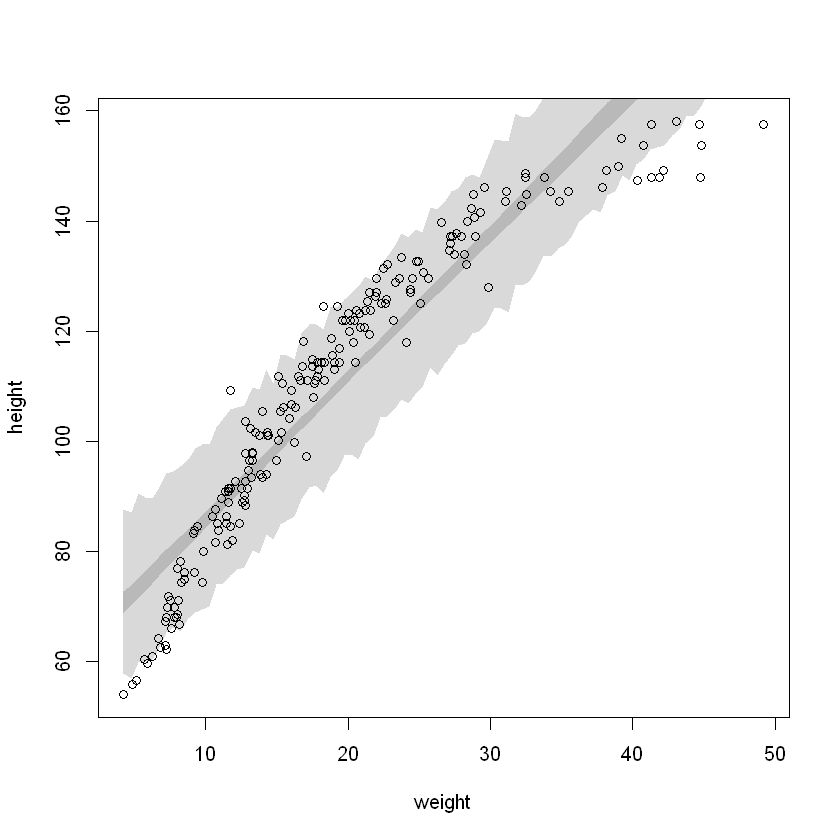

In [24]:
plot(height~weight, d3)
shade(apply( sim.height1 , 2 , HPDI, prob = 0.9 ),w.seq)
shade(apply( mu1 , 2 , HPDI, prob = 0.9 ),w.seq)

In [25]:
4.7.14. Logjam. 
Suppose a colleague of yours, who works on allometry, glances at the practice problems just above.
Your colleague exclaims,
“That’s silly. Everyone knows that it’s only the logarithm of body weight that scales with height!”
Let’s take your colleague’s advice and see what happens.

(a)Model the relationship between height(cm)and the natural logarithm of weight(log-kg).
Use the entire Howell1 dataframe,all 544 rows, adults and non-adults. 

Fit this model, using quadratic approximation: 
    hi ∼Normal(µi,σ) 
    µi = α + βlog(wi) 
    α ∼Normal(138,100) 
    β ∼Normal(0,100) 
    σ ∼Uniform(0,50) 

where hi is the height of individual i and wi is the weight (in kg) of individual i.
The function for computing a natural log in R is just log. Can you interpret the resulting estimates?
    
(b)Begin with this plot:
    plot( height ~ weight , data=Howell1 , col=col.alpha("slateblue",0.4) )

Then use samples from the quadratic approximate posterior of the model in 
    (a)to superimpose on the plot: 
    (1)the predicted mean height as a function of weight,
    (2)the 95% HPDI for the mean,and
    (3)the 95% HPDI for predicted heights.


ERROR: Error in parse(text = x, srcfile = src): <text>:1:4: unexpected numeric constant
1: 4.7.14
       ^


In [28]:
log.model<-map(
    alist(
        height ~ dnorm(mu,sigma),
        mu <- a + b*log(weight),
        a~dnorm(0,10),
        b~dnorm(0,10),
        sigma ~ dunif(0,50)
    ), data=dd
)

In [29]:
log.model


Maximum a posteriori (MAP) model fit

Formula:
height ~ dnorm(mu, sigma)
mu <- a + b * log(weight)
a ~ dnorm(0, 10)
b ~ dnorm(0, 10)
sigma ~ dunif(0, 50)

MAP values:
         a          b      sigma 
-23.172969  46.900734   5.135828 

Log-likelihood: -1662.02 

In [34]:
log(46.900734) #increase 3cm for 1 unit of weight.

[1] 3.848033

[ 1000 / 1000 ]
[ 1000 / 1000 ]


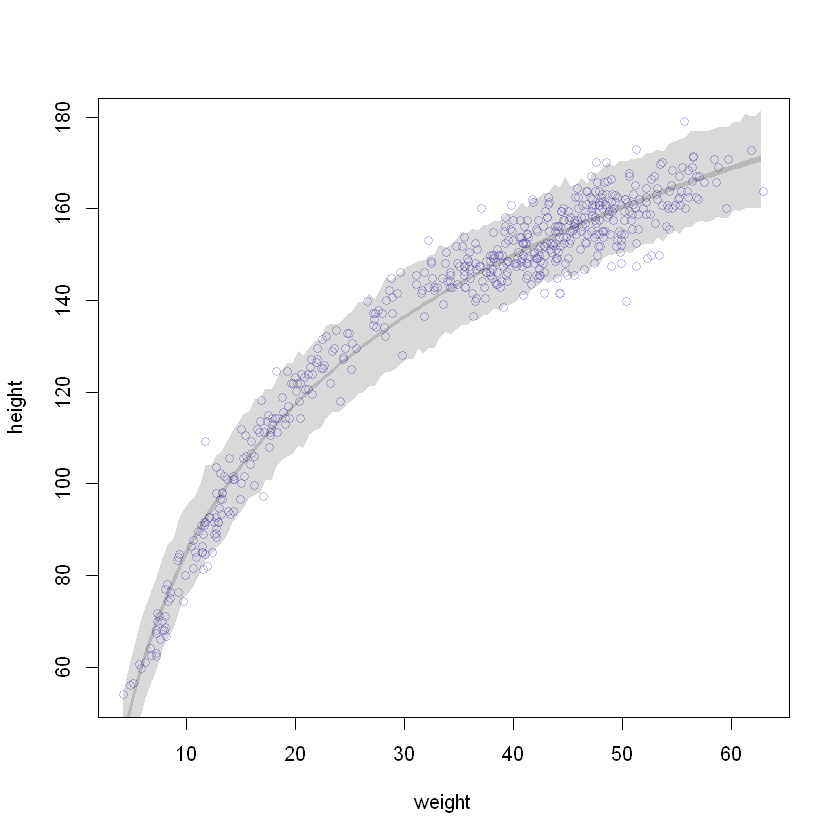

In [54]:
w.seq1<-seq(from=4.252,to=max(dd$weight) ,by=.5)
plot( height ~ weight , data=dd , col=col.alpha("slateblue",0.4) )
mu11 <- link( log.model , data=data.frame(weight=w.seq1) )
sim.height11 <- sim( log.model, data=data.frame(weight=w.seq1),   n=1e3  ) 
shade(apply( sim.height11 , 2 , HPDI, prob = 0.95 ),w.seq1)
shade(apply( mu11 , 2 , HPDI, prob = 0.95 ),w.seq1)
lines(w.seq1,sim.height11[1,])

In [ ]:
#Beta means that for every increase of 1 log-kg of weight,
#you expect a increase of 47 cm of height. But what’s a log-kg? so it will scale differently